1.   What are the most popular neighborhoods for Airbnb rentals in New York City? How do prices and availability vary by neighborhood?

2.   How has the Airbnb market in New York City changed over time? Have there been any significant trends in terms of the number of listings, prices, or occupancy rates?

3.   Are there any patterns or trends in terms of the types of properties that are being rented out on Airbnb in New York City? Are certain types of properties more popular or more expensive than others?

4.   Are there any factors that seem to be correlated with the prices of Airbnb rentals in New York City? 

5.   the best area in New York City for a host to buy property at a good price rate and in an area with high traffic ?

6.   How do the lengths of stay for Airbnb rentals in New York City vary by neighborhood? Do certain neighborhoods tend to attract longer or shorter stays?

7.   How do the ratings of Airbnb rentals in New York City compare to their prices? Are higher-priced rentals more likely to have higher ratings?

8. Find the total numbers of Reviews and Maximum Reviews by Each Neighborhood Group.

9. Find Most reviewed room type in Neighborhood groups per month.

10. Find Best location listing/property location for travelers.

11. Find also best location listing/property location for Hosts.

12. Find Price variations in NYC Neighborhood groups.

there is a lot of problem statements and we have to finds information and insights through different different problem

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt     #for visualization
%matplotlib inline
import seaborn as sns               #for visualization
import warnings
warnings.filterwarnings('ignore')

In [3]:
airbnb_df=pd.read_csv('Airbnb NYC 2019.csv')

In [4]:
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


##**UNDERSTAND THE GIVEN VARIABLES**

**Listing_id :-** This is a unique identifier for each listing in the dataset.

**Listing_name :-** This is the name or title of the listing, as it appears on the Airbnb website.

**Host_id :-** This is a unique identifier for each host in the dataset.

**Host_name :-** This is the name of the host as it appears on the Airbnb website.

**Neighbourhood_group :-** This is a grouping of neighborhoods in New York City, such as Manhattan or Brooklyn.

**Neighbourhood :-** This is the specific neighborhood in which the listing is located.

**Latitude :-** This is the geographic latitude of the listing.

**Longitude :-** This is the geographic longitude of the listing.

**Room_type :-** This is the type of room or property being offered, such as an entire home, private room, shared room.

**Price :-** This is the nightly price for the listing, in US dollars.

**Minimum_nights :-** This is the minimum number of nights that a guest must stay at the listing.

**Total_reviews :-** This is the total number of reviews that the listing has received.

**Reviews_per_month :-** This is the average number of reviews that the listing receives per month.

**Host_listings_count :-** This is the total number of listings that the host has on Airbnb.

**Availability_365 :-** This is the number of days in the next 365 days that the listing is available for booking.

# EDA

In [5]:
airbnb_df.head().T

,0,1,2,3,4
id,2539,2595,3647,3831,5022
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park
host_id,2787,2845,4632,4869,7192
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem
latitude,40.64749,40.75362,40.80902,40.68514,40.79851
longitude,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt
price,149,225,150,89,80


In [6]:
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [7]:
rename_col = {'id':'listing_id','name':'listing_name','number_of_reviews':'total_reviews','calculated_host_listings_count':'host_listings_count'}

In [8]:
airbnb_df=airbnb_df.rename(columns=rename_col)
airbnb_df.head()

,listing_id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,last_review,reviews_per_month,host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [9]:
# Columns and rows
airbnb_df.shape

(48895, 16)

In [10]:
# Check the info and dtypes
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   listing_id           48895 non-null  int64  
 1   listing_name         48879 non-null  object 
 2   host_id              48895 non-null  int64  
 3   host_name            48874 non-null  object 
 4   neighbourhood_group  48895 non-null  object 
 5   neighbourhood        48895 non-null  object 
 6   latitude             48895 non-null  float64
 7   longitude            48895 non-null  float64
 8   room_type            48895 non-null  object 
 9   price                48895 non-null  int64  
 10  minimum_nights       48895 non-null  int64  
 11  total_reviews        48895 non-null  int64  
 12  last_review          38843 non-null  object 
 13  reviews_per_month    38843 non-null  float64
 14  host_listings_count  48895 non-null  int64  
 15  availability_365     48895 non-null 

**So, host_name, neighbourhood_group, neighbourhood and room_type fall into categorical variable category.**

**While host_id, latitude, longitude, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, host_listings_count, availability_365 are numerical variables**

In [11]:
# Check the uniques
airbnb_df.nunique()

listing_id             48895
listing_name           47905
host_id                37457
host_name              11452
neighbourhood_group        5
neighbourhood            221
latitude               19048
longitude              14718
room_type                  3
price                    674
minimum_nights           109
total_reviews            394
last_review             1764
reviews_per_month        937
host_listings_count       47
availability_365         366
dtype: int64

In [12]:
# Check the duplicate rows
airbnb_df.duplicated().sum()
# no duplicate

0

In [13]:
# Null Check
airbnb_df.isnull().sum()

listing_id                 0
listing_name              16
host_id                    0
host_name                 21
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
total_reviews              0
last_review            10052
reviews_per_month      10052
host_listings_count        0
availability_365           0
dtype: int64

In [14]:
# Listing name host name have the null values but last review and reviews per month have the high null values

In [15]:
airbnb_df['listing_name'].fillna('unknown',inplace=True)
airbnb_df['host_name'].fillna('no_name',inplace=True)

In [16]:
airbnb_df.isnull().sum()

listing_id                 0
listing_name               0
host_id                    0
host_name                  0
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
total_reviews              0
last_review            10052
reviews_per_month      10052
host_listings_count        0
availability_365           0
dtype: int64

** Last review is not required so drop this column **

In [17]:
airbnb_df=airbnb_df.drop('last_review',axis=1)

In [18]:
# Fill the reviews per month
airbnb_df['reviews_per_month'].fillna(0,inplace=True)

In [19]:
airbnb_df['reviews_per_month'].dtype
# change the dtypes into int
airbnb_df['reviews_per_month']=airbnb_df['reviews_per_month'].astype(int)

In [20]:
airbnb_df['reviews_per_month'].dtype

dtype('int32')

**Note** - so i think few listings/property with same names has different hosts in different areas/neighbourhoods of a neighbourhood_group

In [21]:
airbnb_df[airbnb_df['host_name']=='David']['listing_name'].nunique()

402

In [22]:
# Lets check the how many names are matched with host name and listing name
airbnb_df[airbnb_df['host_name']==airbnb_df['listing_name']].head()

,listing_id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,reviews_per_month,host_listings_count,availability_365
9473,7264659,Olivier,6994503,Olivier,Manhattan,Upper West Side,40.78931,-73.97520,Entire home/apt,200,5,12,0,1,25
10682,8212051,Monty,43302952,Monty,Brooklyn,East Flatbush,40.66383,-73.92706,Shared room,95,2,7,0,1,238
16422,13186374,Sean,35143476,Sean,Brooklyn,Windsor Terrace,40.65182,-73.98043,Entire home/apt,400,7,0,0,1,0
23996,19348168,Cyn,74033595,Cyn,Brooklyn,Bedford-Stuyvesant,40.67850,-73.91478,Private room,75,2,1,0,1,0
24152,19456810,Hillside Hotel,134184451,Hillside Hotel,Queens,Briarwood,40.70454,-73.81549,Private room,93,1,2,0,18,90


# Descibe the dataset

In [23]:
airbnb_df.describe()

,listing_id,host_id,latitude,longitude,price,minimum_nights,total_reviews,reviews_per_month,host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,0.806258,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.502767,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.000000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.000000,327.000000,365.000000


# Remove Outliers

<AxesSubplot:>

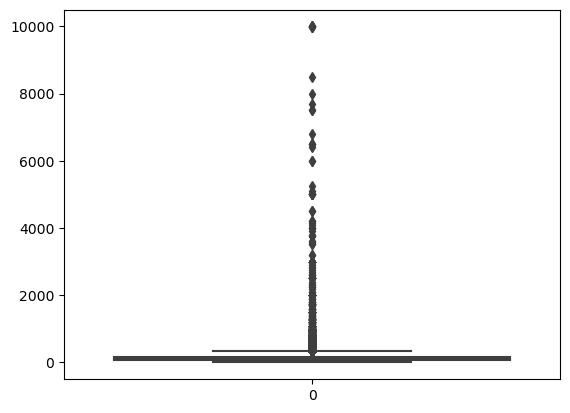

In [24]:
sns.boxplot(airbnb_df['price'])

In [25]:
def interQR(dfcolumn):
    Q1=np.percentile(dfcolumn,25)
    Q3=np.percentile(dfcolumn,75)
    IQR=Q3-Q1
    lower_fence=Q1-(1.5*IQR)
    higer_fence=Q3+(1.5*IQR)
    
    return lower_fence,higer_fence

In [26]:
lower_fence,higher_fence=interQR(airbnb_df['price'])

In [27]:
airbnb_df=airbnb_df[(airbnb_df.price>lower_fence) & (airbnb_df.price<higher_fence)]

<AxesSubplot:>

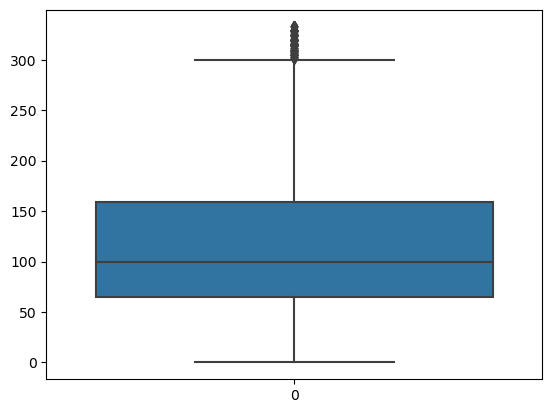

In [28]:
sns.boxplot(airbnb_df['price'])

In [29]:
airbnb_df['price'].min()

0

In [30]:
airbnb_df['price'].max()

333

# Data Visualize

**(1) Distribution Of Airbnb Bookings Price Range Using Histogram**

<AxesSubplot:xlabel='price', ylabel='Count'>

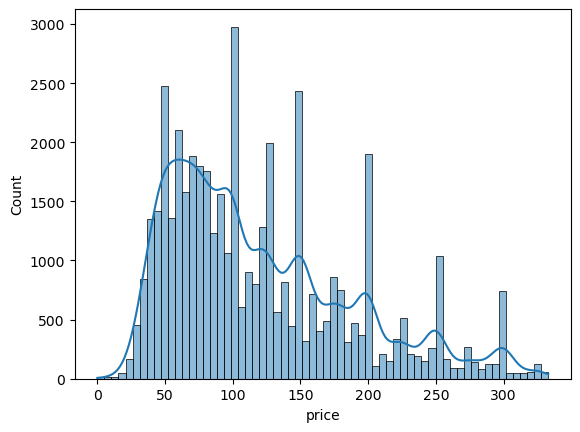

In [31]:
sns.histplot(airbnb_df['price'],kde=True)

#### from above diagram we can say that the most of the price is between 30 to 300
#### Highest bokins are 50 to 200 USD
#### after 250 the density of booking is down

 **(2) Total Listing/Property count in Each Neighborhood Group using Count plot**

In [32]:
counts=airbnb_df['neighbourhood_group'].value_counts()
top_neighbour=counts.reset_index()
top_neighbour.columns = ['Neighborhood_Groups', 'Listing_Counts']

# display the resulting DataFrame
top_neighbour

,Neighborhood_Groups,Listing_Counts
0,Manhattan,19501
1,Brooklyn,19415
2,Queens,5567
3,Bronx,1070
4,Staten Island,365


In [33]:
airbnb_df.head(2)
airbnb_df['neighbourhood_group'].value_counts()

Manhattan        19501
Brooklyn         19415
Queens            5567
Bronx             1070
Staten Island      365
Name: neighbourhood_group, dtype: int64

Text(0, 0.5, 'total listings counts')

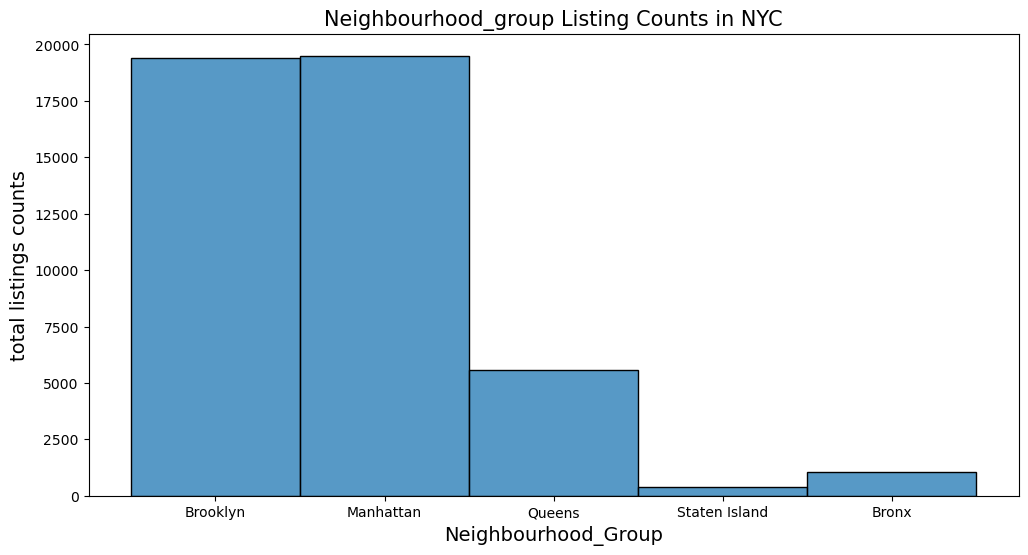

In [34]:

plt.figure(figsize=(12,6))
sns.histplot(airbnb_df['neighbourhood_group'])
plt.title('Neighbourhood_group Listing Counts in NYC', fontsize=15)

# Set the x-axis label
plt.xlabel('Neighbourhood_Group', fontsize=14)

# Set the y-axis label
plt.ylabel('total listings counts', fontsize=14)


#### manhattan has the highest listing values 
#### brooklyn have the less value 19000 
#### Queens have the more then 5k and 5.5k
#### bronx have the 500
#### staten island have the lowes listing values

**(3) Average Price Of Each Neighborhood Group using Point Plot**

In [35]:
grpd=airbnb_df.groupby('neighbourhood_group').mean()

In [36]:
neighbourhood_group_avg_price=grpd.reset_index()

In [37]:
# Rename the "price" column to "avg_price"
neighbourhood_group_avg_price = round(neighbourhood_group_avg_price.rename(columns={"price": "avg_price"}),2)

# Select only the "neighbourhood_group" and "avg_price" columns
neighbourhood_group_avg_price[['neighbourhood_group', 'avg_price']].head()

,neighbourhood_group,avg_price
0,Bronx,77.37
1,Brooklyn,105.70
2,Manhattan,145.90
3,Queens,88.90
4,Staten Island,89.24


<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

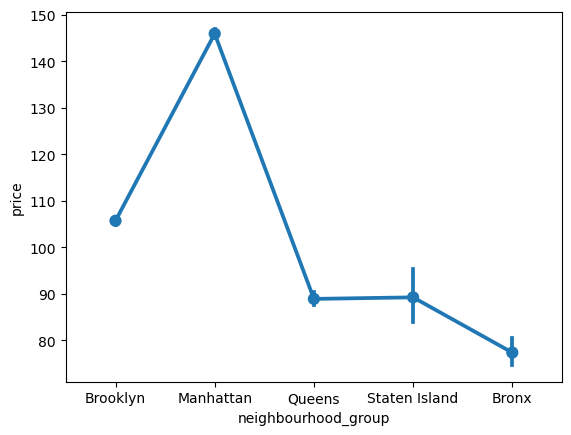

In [38]:
sns.pointplot(x='neighbourhood_group',y='price',data=airbnb_df, estimator = np.mean)

**(4) Price Distribution Of Each Neighborhood Group using Violin Plot**

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

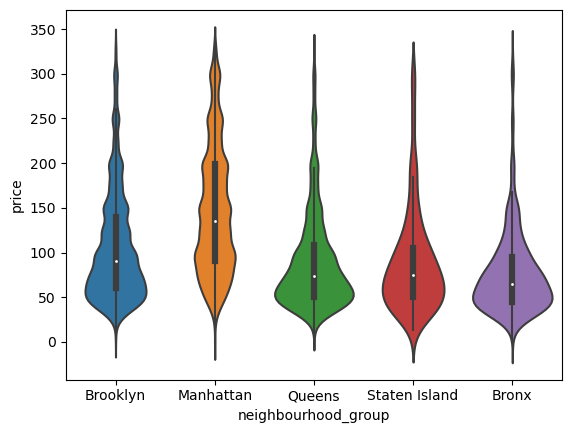

In [39]:
sns.violinplot(x='neighbourhood_group',y='price',data=airbnb_df)

**(4) Top Neighborhoods by Listing/property using Bar plot**

In [40]:
topngb=airbnb_df['neighbourhood'].value_counts()[:10].reset_index()
topngb.columns=['Top_Neighborhoods', 'Listing_Counts']
topngb

,Top_Neighborhoods,Listing_Counts
0,Williamsburg,3732
1,Bedford-Stuyvesant,3638
2,Harlem,2585
3,Bushwick,2438
4,Upper West Side,1788
5,Hell's Kitchen,1731
6,East Village,1714
7,Upper East Side,1670
8,Crown Heights,1519
9,Midtown,1143


<AxesSubplot:>

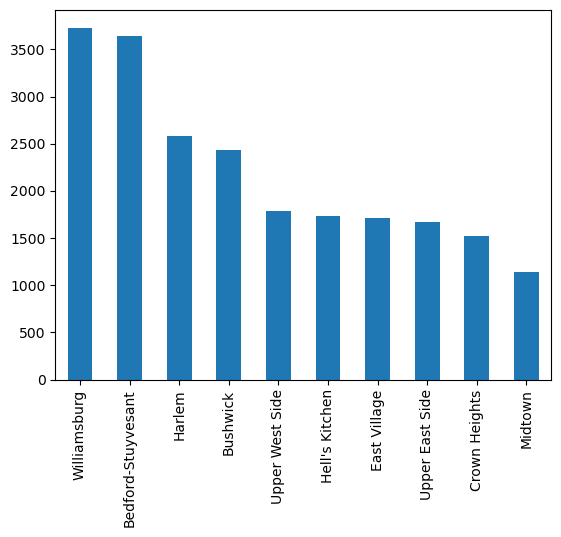

In [41]:
ak=airbnb_df['neighbourhood'].value_counts().nlargest(10)
ak.plot(kind='bar')

# (5) Top Hosts With More Listing/Property using Bar chart

<AxesSubplot:>

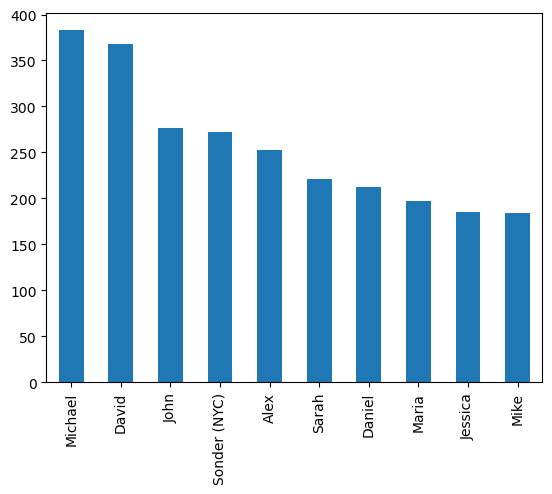

In [42]:
lp=airbnb_df['host_name'].value_counts().nlargest(10)
lp.plot(kind='bar')

In [43]:
lp

Michael         383
David           368
John            276
Sonder (NYC)    272
Alex            253
Sarah           221
Daniel          212
Maria           197
Jessica         185
Mike            184
Name: host_name, dtype: int64

# (6) Number Of Active Hosts Per Location Using Line Chart

In [44]:
# create a new DataFrame that displays the number of hosts in each neighborhood group in the Airbnb NYC dataset
hosts_per_location = airbnb_df.groupby('neighbourhood_group')['listing_id'].count().reset_index()

# rename the columns of the resulting DataFrame to 'Neighbourhood_Groups' and 'Host_counts'
hosts_per_location.columns = ['Neighbourhood_Groups', 'Host_counts']

# display the resulting DataFrame
hosts_per_location

,Neighbourhood_Groups,Host_counts
0,Bronx,1070
1,Brooklyn,19415
2,Manhattan,19501
3,Queens,5567
4,Staten Island,365


In [45]:
# sns.lineplot(data=airbnb_df,x=airbnb_df.groupby('neighbourhood_group')['listing_id'].count())

In [46]:
airbnb_df.head()

,listing_id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,reviews_per_month,host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0,1,0


In [47]:
cols=['listing_id','host_id','host_name','latitude','longitude','price','listing_name']
X=airbnb_df.drop(cols,axis=1)
X.head(1)

,neighbourhood_group,neighbourhood,room_type,minimum_nights,total_reviews,reviews_per_month,host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,1,9,0,6,365


In [48]:
y=airbnb_df['price']

In [49]:
airbnb_df.nunique()

listing_id             45918
listing_name           44988
host_id                35388
host_name              11009
neighbourhood_group        5
neighbourhood            219
latitude               18759
longitude              14534
room_type                  3
price                    321
minimum_nights           105
total_reviews            393
reviews_per_month         22
host_listings_count       47
availability_365         366
dtype: int64

In [50]:
X.corr()

,minimum_nights,total_reviews,reviews_per_month,host_listings_count,availability_365
minimum_nights,1.000000,-0.082851,-0.117291,0.133237,0.146329
total_reviews,-0.082851,1.000000,0.562593,-0.070357,0.183707
reviews_per_month,-0.117291,0.562593,1.000000,-0.043678,0.156463
host_listings_count,0.133237,-0.070357,-0.043678,1.000000,0.225251
availability_365,0.146329,0.183707,0.156463,0.225251,1.000000


In [51]:
# X['minimum_nights']

In [52]:
from sklearn.preprocessing import StandardScaler
sts=StandardScaler()

In [53]:
X[['minimum_nights','total_reviews','reviews_per_month','host_listings_count','availability_365']]=sts.fit_transform(X[['minimum_nights','total_reviews','reviews_per_month','host_listings_count','availability_365']])

In [54]:
X.head(3)

,neighbourhood_group,neighbourhood,room_type,minimum_nights,total_reviews,reviews_per_month,host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,-0.298928,-0.329789,-0.539404,-0.020046,1.962367
1,Manhattan,Midtown,Entire home/apt,-0.298928,0.464621,-0.539404,-0.149337,1.885604
2,Manhattan,Harlem,Private room,-0.198211,-0.528392,-0.539404,-0.181659,1.962367


In [55]:
X['neighbourhood_group'].uniqueque()

AttributeError: 'Series' object has no attribute 'uniqueque'

In [56]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [57]:
X['neighbourhood_group']=enc.fit_transform(X['neighbourhood_group'])

In [58]:
X.head(2)

,neighbourhood_group,neighbourhood,room_type,minimum_nights,total_reviews,reviews_per_month,host_listings_count,availability_365
0,1,Kensington,Private room,-0.298928,-0.329789,-0.539404,-0.020046,1.962367
1,2,Midtown,Entire home/apt,-0.298928,0.464621,-0.539404,-0.149337,1.885604


In [59]:
X['room_type']=enc.fit_transform(X['room_type'])

In [60]:
# z=X['neighbourhood']
# X['neighbourhood']=X['neighbourhood'].astype(str)
type(X['neighbourhood'])
X['neighbourhood']=X['neighbourhood'].str.replace("'","").str.replace('.','').str.replace(' ','')

In [61]:
X['neighbourhood']=np.array(X['neighbourhood']).reshape(-1, 1)


In [62]:
array_1d = X['neighbourhood'].to_numpy()

# Reshape the array to a 2D array with one column
array_2d = array_1d.reshape(-1, 1)

# Assign the reshaped array back to the "A" column
X['neighbourhood']= array_2d

# Print the DataFrame
print(X['neighbourhood'].ndim)

1


In [63]:
X['neighbourhood']=enc.fit_transform(X['neighbourhood'])

In [64]:
y.head(2)

0    149
1    225
Name: price, dtype: int64

In [65]:
airbnb_df['price']=sts.fit_transform(airbnb_df[['price']])

In [66]:
y=airbnb_df['price']

In [67]:
y.head()

0    0.426519
1    1.542254
2    0.441200
3   -0.454325
4   -0.586451
Name: price, dtype: float64

<AxesSubplot:>

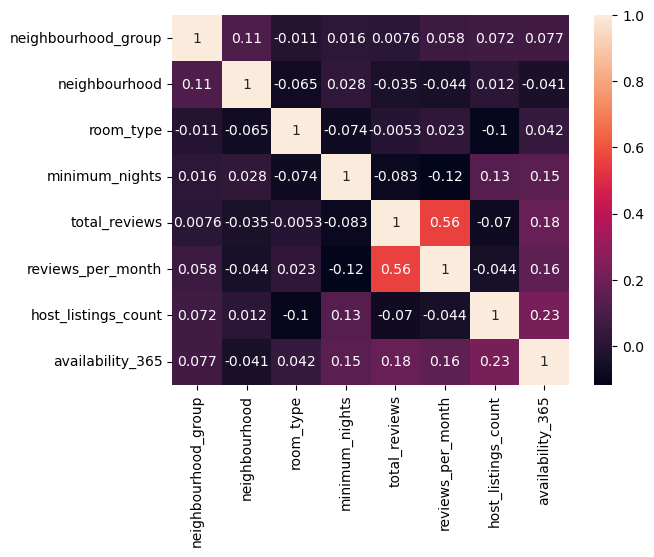

In [118]:
sns.heatmap(X.corr(),annot=True)

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [69]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()

In [70]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [71]:
dtr.score(X_train,y_train)

0.9315212578053114

In [72]:
y_pred=dtr.predict(X_test)

In [73]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.17212596233866062

In [74]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [103]:
params={
    'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
    'max_depth':[6,7,8,10,11,12],
    'max_features':['sqrt', 'log2']
}

In [105]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [99]:
rfr.score(X_train,y_train)

0.8803503224483367

In [100]:
rf_sc=rfr.predict(X_test)

In [101]:
r2_score(rf_sc,y_test)

0.22959483427940375

In [108]:
from sklearn.linear_model import Ridge
rdg=Ridge()

In [109]:
rdg.fit(X_train,y_train)

Ridge()

In [110]:
ridge_p=rdg.predict(X_test)

In [111]:
r2_score(ridge_p,y_test)

-0.4806156621506199

In [112]:
from sklearn.linear_model import ElasticNet
el=ElasticNet()

In [113]:
el.fit(X_train,y_train)

ElasticNet()

In [114]:
el_P=el.predict(X_test)

In [115]:
r2_score(el_P,y_test)

-67.8147959984588